MOVIE GENRE
CLASSIFICATION

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
train_data=pd.read_csv("train_data.txt",sep=":::",engine='python',names=["ID","MOVIE","GENRE","DESCRIPTION"])

In [75]:
train_data.head()

,ID,MOVIE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   MOVIE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [77]:
train_data.isnull().sum()

ID             0
MOVIE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [78]:
test_data = pd.read_csv("test_data.txt", sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [79]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [81]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

EDA

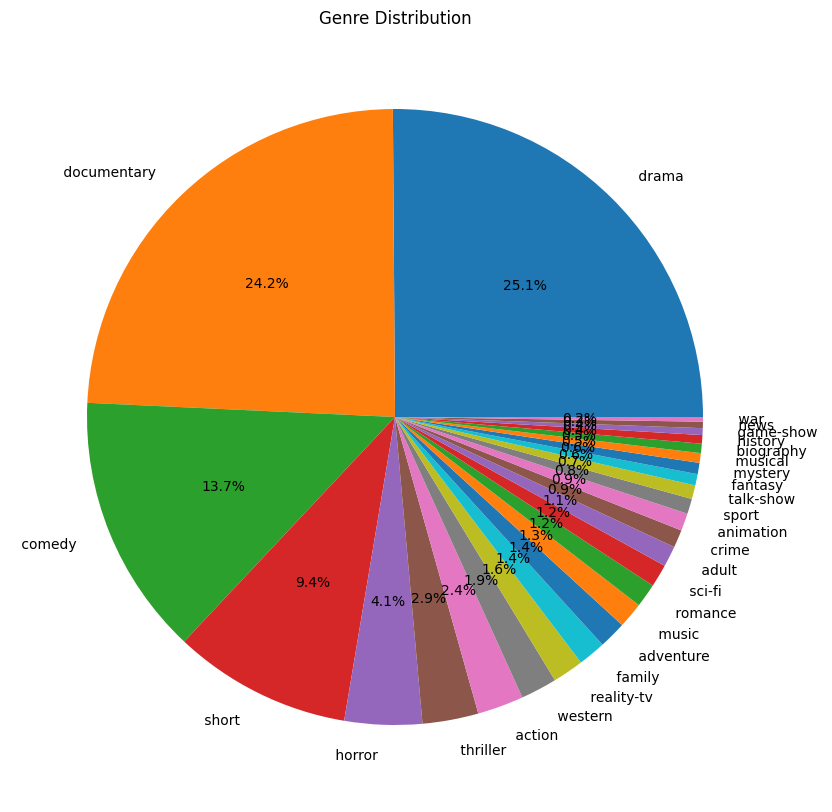

In [97]:
plt.figure(figsize=(10,10))
plt.pie(train_data["GENRE"].value_counts(), labels=train_data["GENRE"].value_counts().index, autopct='%1.1f%%')
plt.title("Genre Distribution")
plt.show()

C:\Users\Taran\AppData\Local\Temp\ipykernel_20428\1237936525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "PuBuGn")


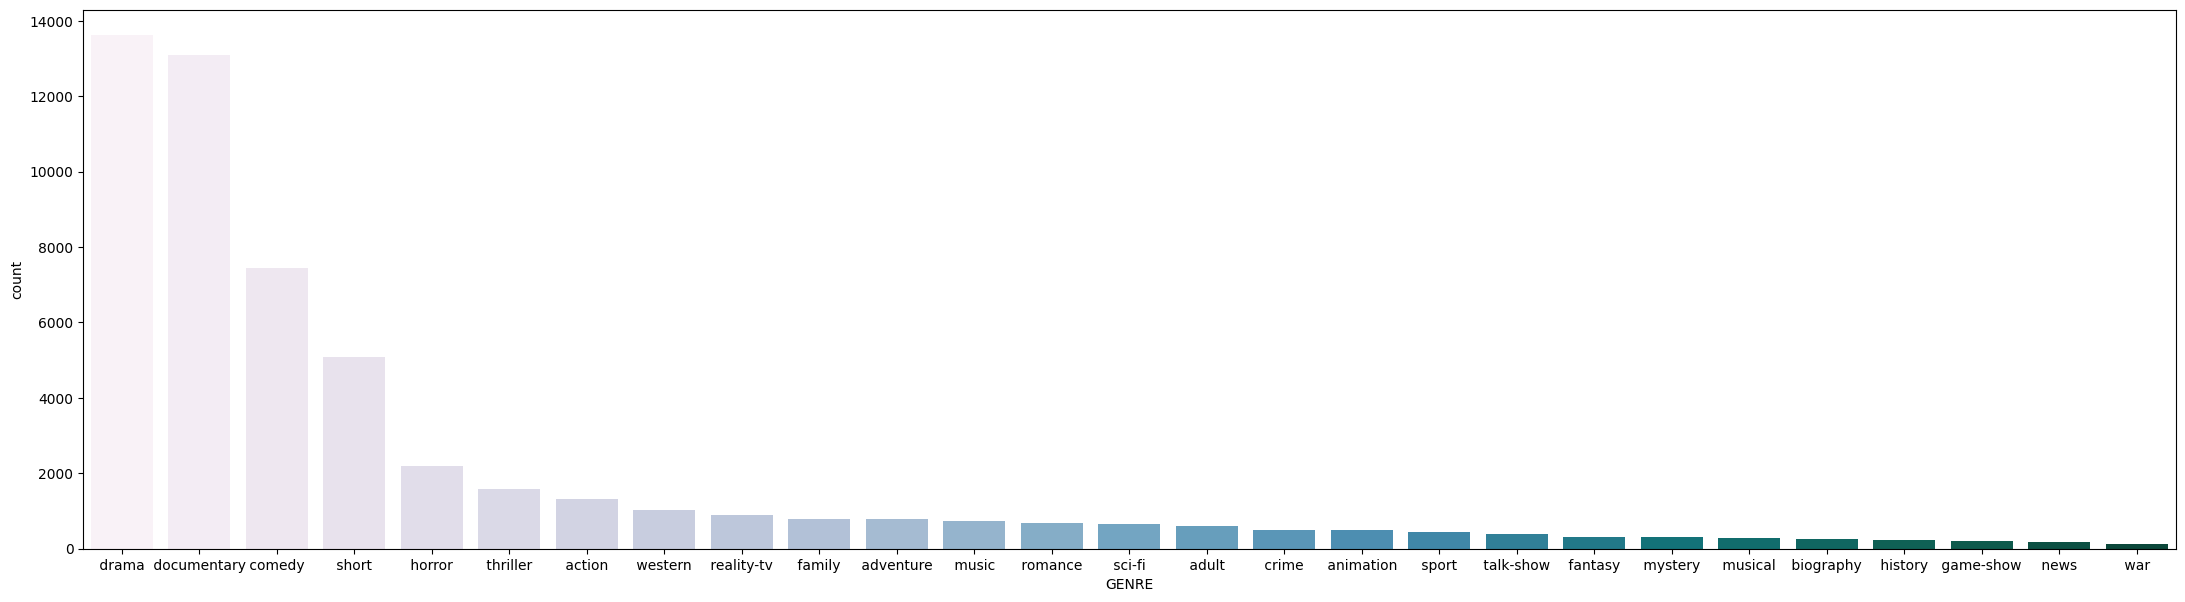

In [102]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "PuBuGn")
plt.show()

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer

In [108]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [111]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [112]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
train_data.dropna(subset=['DESCRIPTION', 'GENRE'], inplace=True)

In [115]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

CLEANING THE DESCRIPTION

In [116]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [117]:
train_data['cleaned_description'] = train_data['DESCRIPTION'].apply(preprocess_text)

In [118]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_data['cleaned_description'])

In [120]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data['GENRE'])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST CLASSIFIER

In [123]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [124]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.50      0.01      0.02       263
       adult        0.82      0.12      0.22       112
   adventure        0.53      0.07      0.13       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.46      0.30      0.37      1443
       crime        1.00      0.01      0.02       107
 documentary        0.57      0.86      0.69      2659
       drama        0.42      0.83      0.56      2697
      family        1.00      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.83      0.38      0.52        40
     history        0.00      0.00      0.00        45
      horror        0.60      0.20      0.30       431
       music        0.67      0.21      0.32       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

LOGISTIC REGRESSION

In [126]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [127]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.53      0.27      0.36       263
       adult        0.77      0.21      0.34       112
   adventure        0.45      0.17      0.24       139
   animation        0.50      0.08      0.13       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.59      0.55      1443
       crime        0.38      0.03      0.05       107
 documentary        0.67      0.83      0.74      2659
       drama        0.54      0.78      0.64      2697
      family        0.44      0.10      0.16       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.45      0.61        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.57      0.60       431
       music        0.63      0.50      0.56       144
     musical        0.25      0.02      0.04        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Support Vector Machine (SVM)

In [152]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

FROM ABOVE TWO MODLE'S CLASSIFICATION REPORT WE CAN SEE THAT LOGISTIC REGRSSION IS WORKING MORE EFFICIENTLY. NOW SAVING THE MODEL FILES AND VECTORIZOR FILES.

In [128]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

LOADING THE MODEL AND PEDICTING ON GIVEN TEST DATA

In [129]:
test_data.dropna(subset=['DESCRIPTION'], inplace=True)

In [131]:
with open('logistic_regression_model.pkl', 'rb') as model_file:
    lr_model = pickle.load(model_file)
    
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

In [132]:
test_data['cleaned_description'] = test_data['DESCRIPTION'].apply(preprocess_text)

In [134]:
X_test = vectorizer.transform(test_data['cleaned_description'])

In [135]:
y_pred = lr_model.predict(X_test)

In [136]:
predicted_genres = label_encoder.inverse_transform(y_pred)

In [138]:
test_data['predicted_genre'] = predicted_genres

In [139]:
test_data.to_csv('test_dataset_with_predictions.csv', index=False)

In [150]:
test_data.head()

,ID,TITLE,DESCRIPTION,cleaned_description,predicted_genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apartment job especially g...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama


In [141]:
print(test_data[['DESCRIPTION', 'predicted_genre']])

                                             DESCRIPTION predicted_genre
0       L.R. Brane loves his life - his car, his apar...          drama 
1       Spain, March 1964: Quico is a very naughty ch...          drama 
2       One year in the life of Albin and his family ...    documentary 
3       His father has died, he hasn't spoken with hi...          drama 
4       Before he was known internationally as a mart...          drama 
...                                                  ...             ...
54195   Covering multiple genres, Tales of Light & Da...          drama 
54196   As Alice and Cora Munro attempt to find their...          drama 
54197   A movie 169 years in the making. Oliver Twist...          drama 
54198   Popular, but mysterious rock D.J Mike Mallard...         comedy 
54199   Curitiba is a city in movement, with rhythms ...    documentary 

[54200 rows x 2 columns]


EDA OF TEST DATA

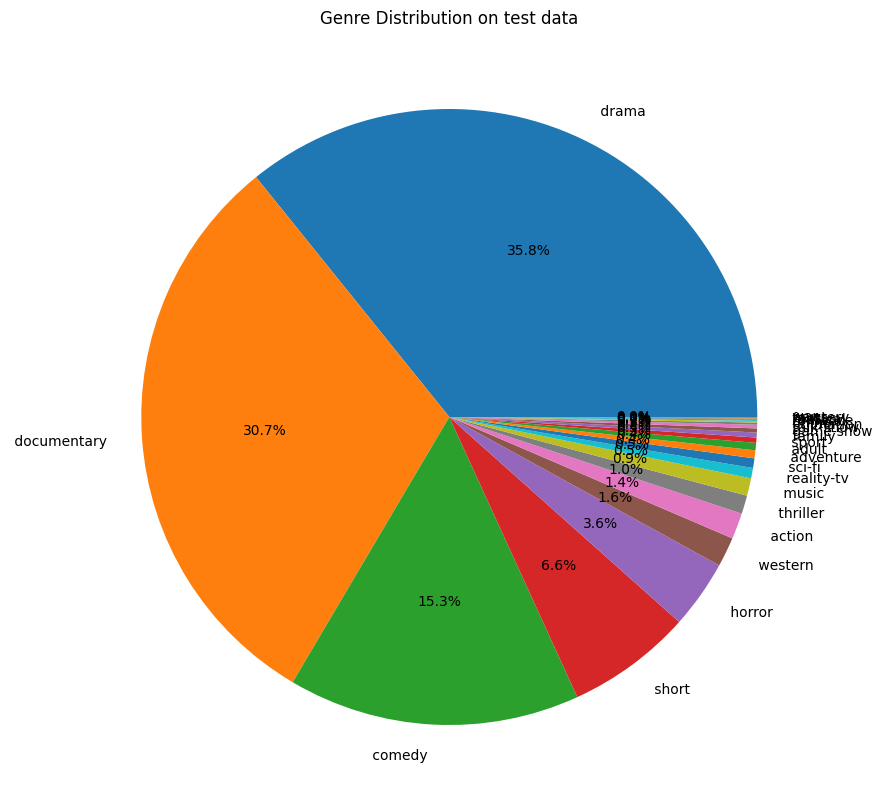

In [142]:
plt.figure(figsize=(10,10))
plt.pie(test_data["predicted_genre"].value_counts(), labels=test_data["predicted_genre"].value_counts().index, autopct='%1.1f%%')
plt.title("Genre Distribution on test data")
plt.show()

C:\Users\Taran\AppData\Local\Temp\ipykernel_20428\2850503228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_data, x="predicted_genre", order= test_data["predicted_genre"].value_counts().index, palette = "PuBuGn")


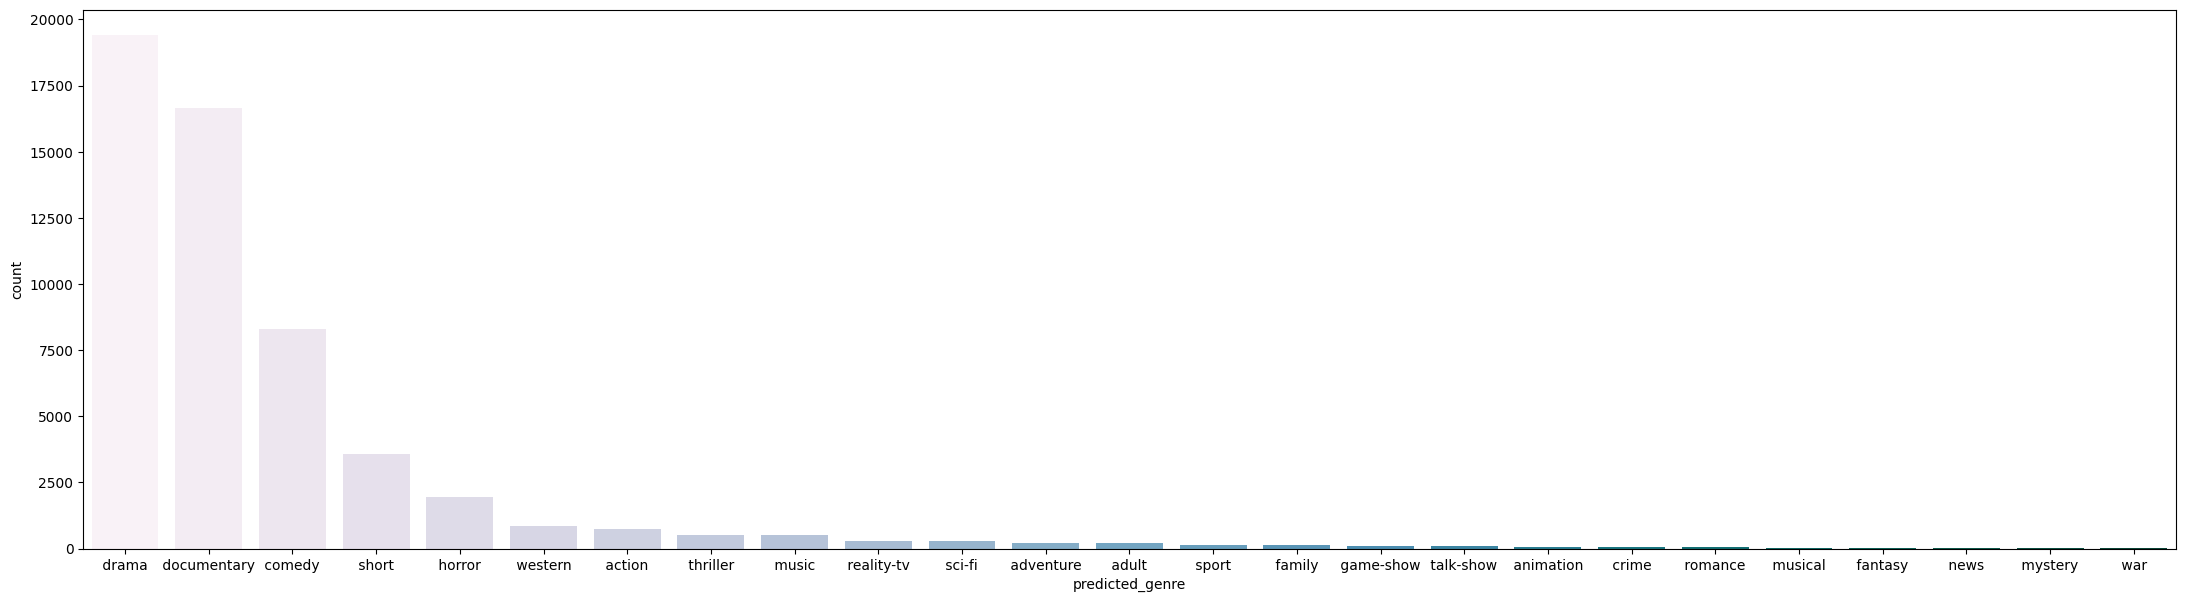

In [143]:
plt.figure(figsize=(27,7))
sns.countplot(data=test_data, x="predicted_genre", order= test_data["predicted_genre"].value_counts().index, palette = "PuBuGn")
plt.show()

In [144]:
test_data_sol=pd.read_csv("test_data_solution.txt",sep=":::",engine="python",names=["ID","MOVIE","GENRE","DESCRIPTION"])

In [145]:
test_data_sol.head()

,ID,MOVIE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [147]:
comparison_df = pd.DataFrame({
    'ID': test_data_sol['ID'],
    'description': test_data_sol['DESCRIPTION'],
    'actual_genre': test_data_sol['GENRE'],
    'predicted_genre': test_data['predicted_genre']
})

In [148]:
accuracy = accuracy_score(comparison_df['actual_genre'], comparison_df['predicted_genre'])
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.58


In [149]:
print(classification_report(comparison_df['actual_genre'], comparison_df['predicted_genre']))

C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.48      0.27      0.34      1314
       adult        0.64      0.23      0.33       590
   adventure        0.59      0.17      0.27       775
   animation        0.51      0.06      0.11       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.58      0.55      7446
       crime        0.35      0.03      0.06       505
 documentary        0.66      0.84      0.74     13096
       drama        0.54      0.77      0.63     13612
      family        0.48      0.09      0.15       783
     fantasy        0.65      0.03      0.06       322
   game-show        0.86      0.51      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.65      0.57      0.61      2204
       music        0.64      0.44      0.52       731
     musical        0.18      0.01      0.03       276
     mystery        0.40      0.01      0.02       318
        n

C:\Users\Taran\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


THANK YOU......